In [1]:
%pip install pandas

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

In [4]:
%pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

In [4]:
df = pd.read_csv("duplicate_question_pair_train.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(404290, 6)

In [6]:
new_df = df.sample(80000,random_state=3)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
226565,226565,197916,175818,How does passage of the GST bill help the comm...,How is GST beneficial for a common man?,1
23936,23936,44791,44792,Is introversion a disadvantaged personality?,Is introversion a good personality trait?,0
225231,225231,333518,72110,What do fish do?,What do fish do all day?,1
201711,201711,303778,303779,My axis debit card got block after some wrong ...,My standard charted Debit card has got blocked...,0
115383,115383,188162,188163,What is the future of Sears as e-commerce?,What is the future of Sears?,0


In [7]:
def preprocess(q):

    q=str(q).lower().strip()
    q=BeautifulSoup(q)
    q=q.get_text()

    q=q.replace("%"," percent")
    q=q.replace("$"," dollar ")
    q=q.replace("₹"," ruppees ")
    q=q.replace("€"," euro ")
    q=q.replace("@"," at ")
    q=q.replace("&"," and ")

    q=q.replace("[math]","")

    q=q.replace(",000,000,000","b")
    q=q.replace(",000,000","m")
    q=q.replace(",000","k")
    q=re.sub(r"([0-9]+)000000000",r"\1b",q)
    q=re.sub(r"([0-9]+)000000",r"\1m",q)
    q=re.sub(r"([0-9]+)000",r"\1k",q)
    contractions= {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
   }
    q_decontracted=[]

    for word in q.split():
      if word in contractions:

        word=contractions[word]

      q_decontracted.append(word)


    q=" ".join(q_decontracted)
    q=str(q).lower().strip()
    q=q.replace("'ve"," have")
    q=q.replace("n't"," not")
    q=q.replace("'re"," are")
    q=q.replace("'ll"," will")


    pattern=re.compile("\W")
    q=re.sub(pattern," ",q).strip()

    return q

    

In [8]:
preprocess("<strong>I'll go to <b>the</b> market</strong>")

'i will go to the market'

In [9]:
new_df["question1"]=new_df["question1"].apply(preprocess)
new_df["question2"]=new_df["question2"].apply(preprocess)

C:\Users\HP\AppData\Local\Temp\ipykernel_35072\2701674412.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q=BeautifulSoup(q)


In [10]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0
225231,225231,333518,72110,what do fish do,what do fish do all day,1
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0


In [11]:
new_df["q1_len"]=new_df["question1"].str.len()
new_df["q2_len"]=new_df["question2"].str.len()

In [12]:

new_df["q1_num_words"]=new_df["question1"].apply(lambda row: len(row.split(" ")))
new_df["q2_num_words"]=new_df["question2"].apply(lambda row: len(row.split(" ")))

In [13]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip() , row["question1"].split(" ")))
    w2=set(map(lambda word: word.lower().strip() , row["question2"].split(" ")))
    return len(w1 & w2)

In [14]:
new_df["common_words"]=new_df.apply(common_words,axis=1)

In [15]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip() , row["question1"].split(" ")))
    w2=set(map(lambda word: word.lower().strip() , row["question2"].split(" ")))
    return len(w1) + len(w2)

In [16]:

new_df["total_words"]=new_df.apply(total_words,axis=1)

In [17]:

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15


In [18]:
new_df["word_share"]=round(new_df["common_words"]/new_df['total_words']*100,2)

In [19]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20,20.00
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11,36.36
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8,37.50
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36,41.67
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15,40.00


In [ ]:
%pip install nltk

In [20]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1=row["question1"]
    q2=row["question2"]
    STOP_WORDS=stopwords.words("english")
    SAFE_DIV=0.0001
    token_features=[0.0]*8

    q1_tokens=q1.split(" ")
    q2_tokens=q2.split(" ")

    if (len(q1_tokens)==0 or (len(q2_tokens)==0)):
        return token_features

    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])


    q1_stop=set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stop=set([word for word in q2_tokens if word in STOP_WORDS])

    common_word_count=len(q1_words.intersection(q2_words))


    common_stop_count=len(q1_stop.intersection(q2_stop))


    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0]=common_word_count/(min(len(q1_tokens),len(q2_tokens)+SAFE_DIV))
    token_features[1]=common_word_count/(max(len(q1_tokens),len(q2_tokens)+SAFE_DIV))

    token_features[2]=common_stop_count/(min(len(q1_tokens),len(q2_tokens)+SAFE_DIV))
    token_features[3]=common_stop_count/(max(len(q1_tokens),len(q2_tokens)+SAFE_DIV))

    token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens)+SAFE_DIV))
    token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens)+SAFE_DIV))

    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])

    token_features[7]=int(q1_tokens[0]==q2_tokens[0])

    return token_features

In [22]:
token_features=new_df.apply(fetch_token_features,axis=1)

new_df["cwc_min"] = list(map(lambda x : x[0], token_features))
new_df["cwc_max"] = list(map(lambda x : x[1] ,token_features))
new_df["csc_min"] = list(map(lambda x : x[2], token_features))
new_df["csc_max"] = list(map(lambda x : x[3], token_features))
new_df["ctc_min"] = list(map(lambda x : x[4], token_features))
new_df["ctc_max"] = list(map(lambda x : x[5], token_features))
new_df["last_word_eq"] = list(map(lambda x : x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x : x[7], token_features))

In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20,20.00,0.374995,0.230769,0.124998,0.076923,0.499994,0.307692,0,1
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11,36.36,0.400000,0.333328,0.400000,0.333328,0.800000,0.666656,0,1
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8,37.50,0.250000,0.166664,0.500000,0.333328,0.750000,0.499992,0,1
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36,41.67,0.470588,0.421050,0.411765,0.368419,0.882353,0.789470,1,1
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15,40.00,0.333328,0.222222,0.666656,0.444444,0.999983,0.666667,0,1


In [26]:
%pip install distance

Note: you may need to restart the kernel to use updated packages.


In [24]:

import distance
def fetch_length_features(row):
    q1=row["question1"]
    q2=row["question2"]

    q1_tokens=q1.split(" ")
    q2_tokens=q2.split(" ")

    length_features=[0.0]*3

    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features

    #abs length
    length_features[0]= abs(len(q1_tokens)-len(q2_tokens))

    #avg length
    length_features[1] = (len(q1_tokens)+len(q2_tokens)) / 2

    strs=list(distance.lcsubstrings(q1,q2))
    try:
        length_features[2]=len(strs[0])/(min(len(q1) ,len(q2))+1)
    except:
        length_features[2]=0

    return length_features

In [25]:
length_features=new_df.apply(fetch_length_features,axis=1)

new_df['abs_len_diff']=list(map(lambda x:x[0],length_features))
new_df['mean_len']=list(map(lambda x:x[1],length_features))
new_df['longest_substr_ratio']=list(map(lambda x:x[2],length_features))

In [26]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20,20.00,0.374995,0.230769,0.124998,0.076923,0.499994,0.307692,0,1,5,10.5,0.282051
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11,36.36,0.400000,0.333328,0.400000,0.333328,0.800000,0.666656,0,1,1,5.5,0.439024
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8,37.50,0.250000,0.166664,0.500000,0.333328,0.750000,0.499992,0,1,2,5.0,0.937500
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36,41.67,0.470588,0.421050,0.411765,0.368419,0.882353,0.789470,1,1,2,18.0,0.641975
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15,40.00,0.333328,0.222222,0.666656,0.444444,0.999983,0.666667,0,1,3,7.5,0.964286


In [30]:
%pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [27]:

from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1=row["question1"]
    q2=row["question2"]

    fuzzy_features=[0.0]*4

    fuzzy_features[0]=fuzz.QRatio(q1,q2)

    fuzzy_features[1]=fuzz.partial_ratio(q1,q2)

    fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)

    fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)

    return fuzzy_features

c:\Users\HP\anaconda3\envs\py310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [28]:
fuzzy_features = new_df.apply(fetch_fuzzy_features,axis=1)

new_df["fuzz_ratio"]=list(map(lambda x:x[0],fuzzy_features))
new_df["fuzz_partial_ratio"]=list(map(lambda x:x[1],fuzzy_features))
new_df["token_sort_ratio"]=list(map(lambda x:x[2],fuzzy_features))
new_df["token_set_ratio"]=list(map(lambda x:x[3],fuzzy_features))

In [29]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20,20.00,0.374995,0.230769,0.124998,0.076923,0.499994,0.307692,0,1,5,10.5,0.282051,53,58,53,64
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11,36.36,0.400000,0.333328,0.400000,0.333328,0.800000,0.666656,0,1,1,5.5,0.439024,77,72,77,84
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8,37.50,0.250000,0.166664,0.500000,0.333328,0.750000,0.499992,0,1,2,5.0,0.937500,79,100,79,100
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36,41.67,0.470588,0.421050,0.411765,0.368419,0.882353,0.789470,1,1,2,18.0,0.641975,87,91,84,93
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15,40.00,0.333328,0.222222,0.666656,0.444444,0.999983,0.666667,0,1,3,7.5,0.964286,79,100,79,100


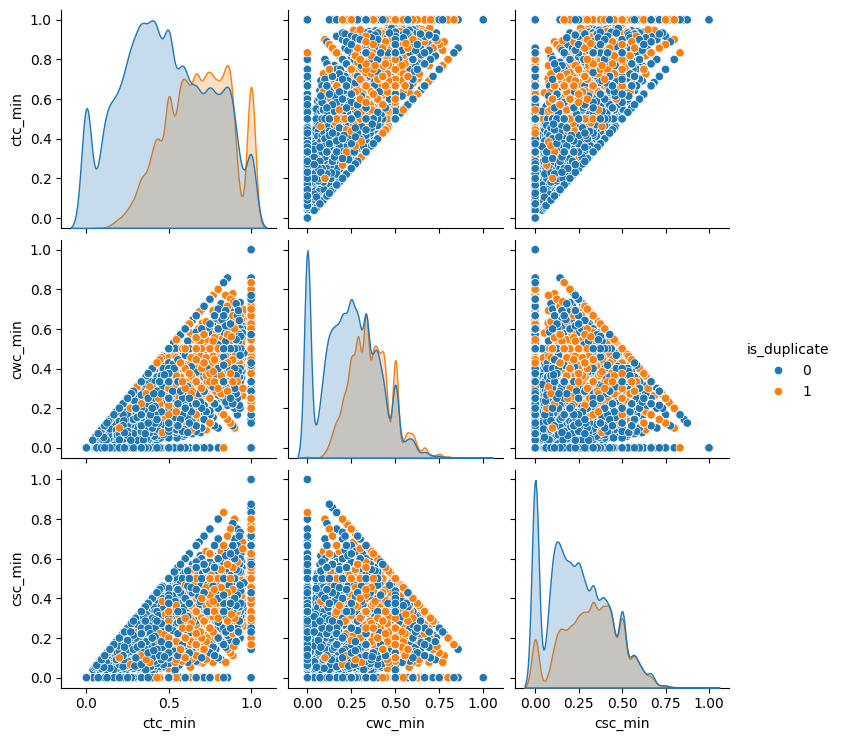

In [34]:
sns.pairplot(new_df[["ctc_min","cwc_min","csc_min","is_duplicate"]],hue= "is_duplicate")

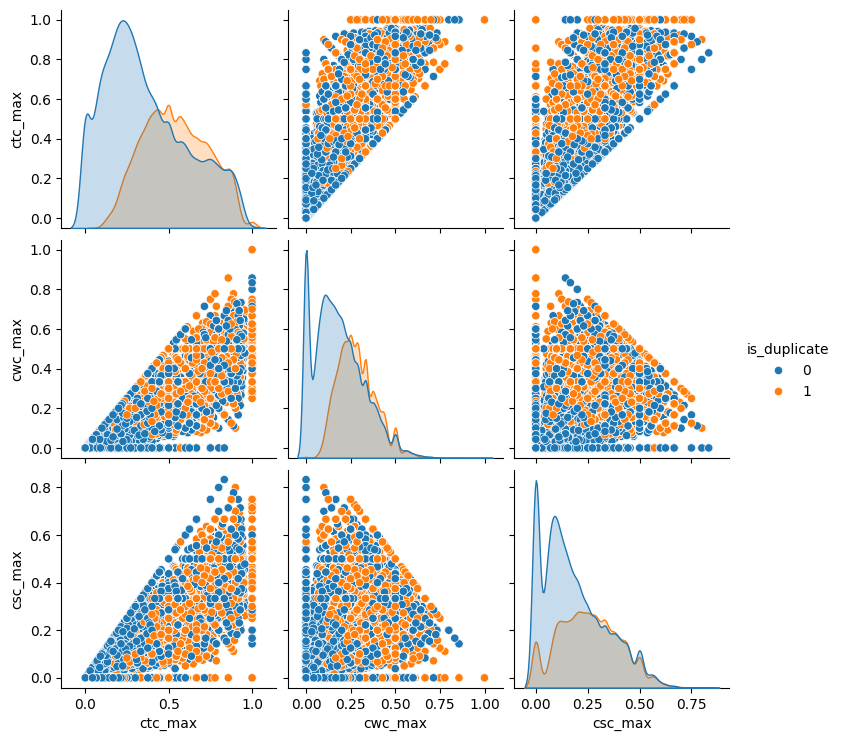

In [35]:
sns.pairplot(new_df[["ctc_max","cwc_max","csc_max","is_duplicate"]],hue= "is_duplicate")

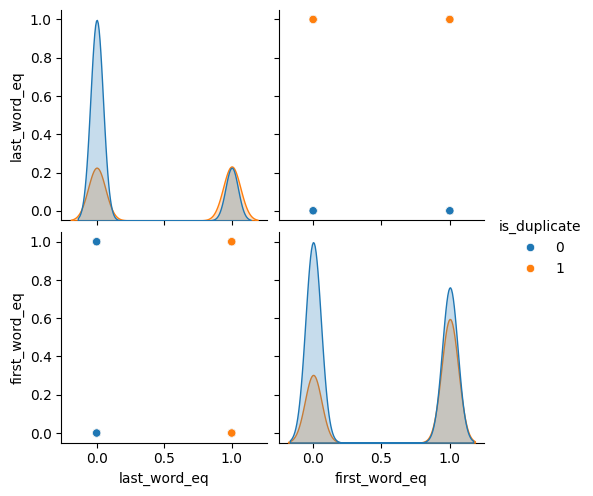

In [36]:
sns.pairplot(new_df[["last_word_eq","first_word_eq","is_duplicate"]],hue= "is_duplicate")

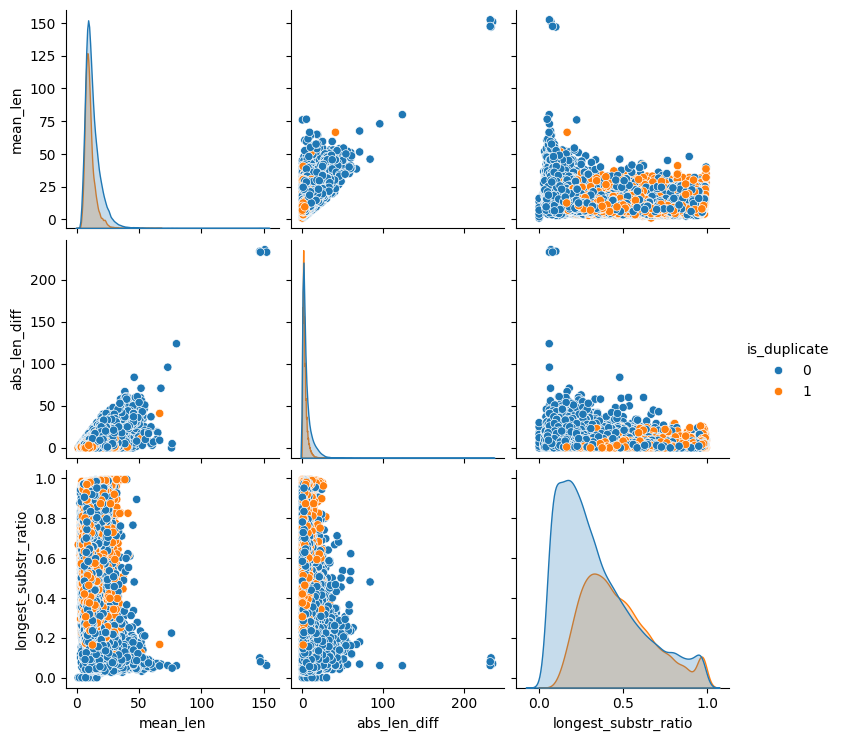

In [37]:
sns.pairplot(new_df[["mean_len","abs_len_diff","longest_substr_ratio","is_duplicate"]],hue= "is_duplicate")

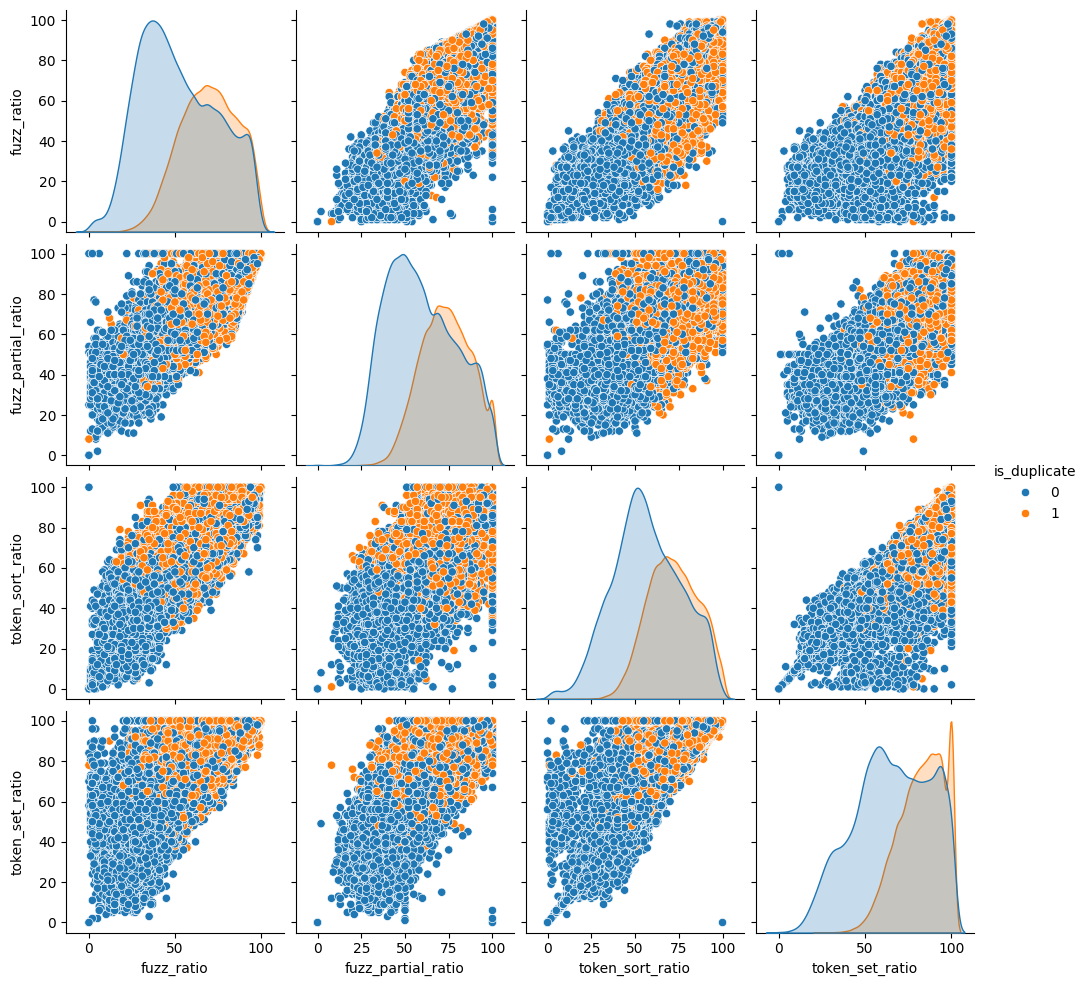

In [38]:
sns.pairplot(new_df[["fuzz_ratio","fuzz_partial_ratio","token_sort_ratio","token_set_ratio","is_duplicate"]],hue= "is_duplicate")

In [39]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(new_df[["cwc_min","cwc_max","csc_min","csc_max","ctc_min","ctc_max","last_word_eq","first_word_eq","mean_len","abs_len_diff","longest_substr_ratio","fuzz_ratio","fuzz_partial_ratio","token_sort_ratio","token_set_ratio"]])
y=new_df["is_duplicate"].values

In [31]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
226565,how does passage of the gst bill help the comm...,how is gst beneficial for a common man
23936,is introversion a disadvantaged personality,is introversion a good personality trait
225231,what do fish do,what do fish do all day
201711,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...
115383,what is the future of sears as e commerce,what is the future of sears


In [32]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(80000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
226565,1,61,38,13,8,4,20,20.00,0.374995,0.230769,0.124998,0.076923,0.499994,0.307692,0,1,5,10.5,0.282051,53,58,53,64
23936,0,43,40,5,6,4,11,36.36,0.400000,0.333328,0.400000,0.333328,0.800000,0.666656,0,1,1,5.5,0.439024,77,72,77,84
225231,1,15,23,4,6,3,8,37.50,0.250000,0.166664,0.500000,0.333328,0.750000,0.499992,0,1,2,5.0,0.937500,79,100,79,100
201711,0,80,98,17,19,15,36,41.67,0.470588,0.421050,0.411765,0.368419,0.882353,0.789470,1,1,2,18.0,0.641975,87,91,84,93
115383,0,41,27,9,6,6,15,40.00,0.333328,0.222222,0.666656,0.444444,0.999983,0.666667,0,1,3,7.5,0.964286,79,100,79,100


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [34]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(80000, 6000)

In [35]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(80000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
226565,1,61,38,13,8,4,20,20.00,0.374995,0.230769,0.124998,0.076923,0.499994,0.307692,0,1,5,10.5,0.282051,53,58,53,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23936,0,43,40,5,6,4,11,36.36,0.400000,0.333328,0.400000,0.333328,0.800000,0.666656,0,1,1,5.5,0.439024,77,72,77,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
225231,1,15,23,4,6,3,8,37.50,0.250000,0.166664,0.500000,0.333328,0.750000,0.499992,0,1,2,5.0,0.937500,79,100,79,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201711,0,80,98,17,19,15,36,41.67,0.470588,0.421050,0.411765,0.368419,0.882353,0.789470,1,1,2,18.0,0.641975,87,91,84,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
115383,0,41,27,9,6,6,15,40.00,0.333328,0.222222,0.666656,0.444444,0.999983,0.666667,0,1,3,7.5,0.964286,79,100,79,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8039375

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[8776, 1419],
       [1718, 4087]], dtype=int64)

In [49]:
%pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

Note: you may need to restart the kernel to use updated packages.


0.799375

In [50]:
confusion_matrix(y_test,y_pred1)

array([[8616, 1579],
       [1631, 4174]], dtype=int64)

In [37]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [38]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [39]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8


    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    common_word_count = len(q1_words.intersection(q2_words))

    common_stop_count = len(q1_stops.intersection(q2_stops))

    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [40]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3


    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))


    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [41]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4


    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)


    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [42]:
def query_point_creator(q1,q2):
    input_query=[]
    q1=preprocess(q1)
    q2=preprocess(q2)

    input_query.append(len(q1))
    input_query.append(len(q2))
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))

    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    token_features=test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    length_features=test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    fuzzy_features=test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    q1_bow=cv.transform([q1]).toarray()
    q2_bow=cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [43]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [44]:
rf.predict(query_point_creator(q1,q3))

NameError: name 'rf' is not defined

In [59]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [45]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(ques_df['question1']) + list(ques_df['question2']))


q1_seq = tokenizer.texts_to_sequences(ques_df['question1'])
q2_seq = tokenizer.texts_to_sequences(ques_df['question2'])


max_seq_length = max(max(len(seq) for seq in q1_seq), max(len(seq) for seq in q2_seq))
padded_q1_seq = pad_sequences(q1_seq, maxlen=max_seq_length)
padded_q2_seq = pad_sequences(q2_seq, maxlen=max_seq_length)

In [46]:
print(tokenizer.word_index)

{'the': 1, 'what': 2, 'is': 3, 'i': 4, 'how': 5, 'a': 6, 'to': 7, 'in': 8, 'do': 9, 'of': 10, 'are': 11, 'and': 12, 'can': 13, 'for': 14, 'you': 15, 'why': 16, 'my': 17, 'it': 18, 'best': 19, 'on': 20, 'does': 21, 'have': 22, 'or': 23, 'if': 24, 'be': 25, 'which': 26, 'some': 27, 'with': 28, 'that': 29, 'get': 30, 'should': 31, 'not': 32, 'an': 33, 'from': 34, 'your': 35, 's': 36, 'will': 37, 'india': 38, 'who': 39, 'at': 40, 'like': 41, 'when': 42, 'people': 43, 'good': 44, 'there': 45, 'would': 46, 'as': 47, 'about': 48, 'between': 49, 'one': 50, 'did': 51, 'am': 52, 'way': 53, 'most': 54, 'we': 55, 'make': 56, 'quora': 57, 'where': 58, 'any': 59, 'by': 60, 'life': 61, 'me': 62, 'was': 63, 'so': 64, 'after': 65, 'time': 66, 'they': 67, 'this': 68, 'money': 69, 'has': 70, 'know': 71, 'difference': 72, 'learn': 73, 'much': 74, 'use': 75, 'someone': 76, 'new': 77, 'their': 78, 'many': 79, 'work': 80, 'all': 81, 'than': 82, 'think': 83, 'trump': 84, 'more': 85, 'indian': 86, 'find': 87, 

In [47]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    np.hstack((padded_q1_seq, padded_q2_seq)), final_df['is_duplicate'].values, test_size=0.2, random_state=1
)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

modellstm = Sequential()
modellstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length*2))
modellstm.add(SpatialDropout1D(0.2))
modellstm.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
modellstm.add(Dense(units=1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.001)
modellstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


modellstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 494, 100)          4155100   
                                                                 
 spatial_dropout1d (SpatialD  (None, 494, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 4,235,601
Trainable params: 4,235,601
Non-trainable params: 0
_________________________________________________________________


In [64]:
history = modellstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=64,
                        validation_data=(X_test_lstm, y_test_lstm),
                        callbacks=[early_stopping])

Epoch 1/20
1000/1000 [==============================] - 1474s 1s/step - loss: 0.5813 - accuracy: 0.6980 - val_loss: 0.5337 - val_accuracy: 0.7399
Epoch 2/20
1000/1000 [==============================] - 1640s 2s/step - loss: 0.5005 - accuracy: 0.7574 - val_loss: 0.5261 - val_accuracy: 0.7377
Epoch 3/20
1000/1000 [==============================] - 1465s 1s/step - loss: 0.4405 - accuracy: 0.7936 - val_loss: 0.5615 - val_accuracy: 0.7122
Epoch 4/20
1000/1000 [==============================] - 1510s 2s/step - loss: 0.3918 - accuracy: 0.8192 - val_loss: 0.5697 - val_accuracy: 0.7314
Epoch 5/20
1000/1000 [==============================] - 1447s 1s/step - loss: 0.3567 - accuracy: 0.8323 - val_loss: 0.6250 - val_accuracy: 0.6993


In [65]:
modellstm.save('lstm_model.h5')

In [66]:
#LSTM
loss, accuracy = modellstm.evaluate(X_test_lstm, y_test_lstm)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

500/500 [==============================] - 119s 237ms/step - loss: 0.5261 - accuracy: 0.7377
Test Loss: 0.5261070132255554
Test Accuracy: 0.7376875281333923


In [67]:
#BiLSTM

In [49]:
from keras.layers import Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

modelbilstm = Sequential()
modelbilstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length*2))
modelbilstm.add(SpatialDropout1D(0.2))
modelbilstm.add(Bidirectional(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2)))
modelbilstm.add(Dense(units=1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.001)
modelbilstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [69]:
history = modelbilstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=64,
                          validation_data=(X_test_lstm, y_test_lstm),
                          callbacks=[early_stopping])

Epoch 1/20
1000/1000 [==============================] - 2467s 2s/step - loss: 0.5728 - accuracy: 0.7033 - val_loss: 0.5258 - val_accuracy: 0.7333
Epoch 2/20
1000/1000 [==============================] - 2465s 2s/step - loss: 0.5045 - accuracy: 0.7521 - val_loss: 0.5393 - val_accuracy: 0.7298
Epoch 3/20
1000/1000 [==============================] - 2493s 2s/step - loss: 0.4456 - accuracy: 0.7865 - val_loss: 0.5543 - val_accuracy: 0.7202
Epoch 4/20
1000/1000 [==============================] - 2478s 2s/step - loss: 0.3912 - accuracy: 0.8160 - val_loss: 0.6177 - val_accuracy: 0.7089


In [70]:
modelbilstm.save('bilstm_model.h5')

In [71]:
# BiLSTM
loss, accuracy = modelbilstm.evaluate(X_test_lstm, y_test_lstm)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

500/500 [==============================] - 245s 490ms/step - loss: 0.5258 - accuracy: 0.7333
Test Loss: 0.5258172750473022
Test Accuracy: 0.7333124876022339


In [72]:
#GRU

In [50]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split


tokenizer = Tokenizer()
tokenizer.fit_on_texts(ques_df['question1'].tolist() + ques_df['question2'].tolist())
vocab_size = len(tokenizer.word_index) + 1

max_length = 100
encoded_q1 = tokenizer.texts_to_sequences(ques_df['question1'])
encoded_q2 = tokenizer.texts_to_sequences(ques_df['question2'])

padded_q1_seq = pad_sequences(encoded_q1, maxlen=max_length, padding='post')
padded_q2_seq = pad_sequences(encoded_q2, maxlen=max_length, padding='post')


modelGRU = Sequential()
modelGRU.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length*2))
modelGRU.add(GRU(units=64))
modelGRU.add(Dense(units=1, activation='sigmoid'))


modelGRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


X_train, X_test, y_train, y_test = train_test_split(np.hstack((padded_q1_seq, padded_q2_seq)), final_df['is_duplicate'].values, test_size=0.2, random_state=42)



In [53]:
modelGRU.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
1000/1000 [==============================] - 26s 26ms/step - loss: 0.1650 - accuracy: 0.9299 - val_loss: 0.8179 - val_accuracy: 0.7249
Epoch 2/20
1000/1000 [==============================] - 29s 29ms/step - loss: 0.1285 - accuracy: 0.9461 - val_loss: 0.9901 - val_accuracy: 0.7155
Epoch 3/20
1000/1000 [==============================] - 29s 29ms/step - loss: 0.1075 - accuracy: 0.9561 - val_loss: 1.0411 - val_accuracy: 0.7283
Epoch 4/20
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0895 - accuracy: 0.9638 - val_loss: 1.0734 - val_accuracy: 0.7208
Epoch 5/20
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0762 - accuracy: 0.9693 - val_loss: 1.1983 - val_accuracy: 0.7196
Epoch 6/20
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0652 - accuracy: 0.9736 - val_loss: 1.3902 - val_accuracy: 0.6974
Epoch 7/20
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0579 - accuracy: 0.9774 - val_loss: 1.3506 -

In [54]:
# GRU
loss, accuracy = modelGRU.evaluate(X_test_lstm, y_test_lstm)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

500/500 [==============================] - 10s 19ms/step - loss: 0.3304 - accuracy: 0.8878
Test Loss: 0.3304407596588135
Test Accuracy: 0.8878124952316284


In [55]:
modelGRU.save('modelGRU_model.h5')

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Step 1: Load your CSV file
df = pd.read_csv('data/duplicate_question_pair_train.csv')

# Step 2: Handle NaN values
df['question1'] = df['question1'].fillna('')
df['question2'] = df['question2'].fillna('')

# Step 3: Combine the questions
questions = list(df['question1']) + list(df['question2'])

# Step 4: Fit the CountVectorizer
vectorizer = CountVectorizer(max_features=3000)
vectorizer.fit(questions)

# Step 5: Save the fitted vectorizer
joblib.dump(vectorizer, "models/vectorizer.pkl")


['models/vectorizer.pkl']